In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/7월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.750000,0.669355,1.120482,0.167805,4.745306,3.812847,7.602878,6.108902
1,중랑구,(구)신한은행 중랑교지점,1,0.669355,0.588710,1.136986,0.175866,4.837189,3.900160,8.768773,7.070142
2,중랑구,(구)신한은행 중랑교지점,2,0.508065,0.556452,0.913043,0.075129,3.400273,2.555826,7.236257,5.439155
3,중랑구,(구)신한은행 중랑교지점,3,0.362903,0.306452,1.184211,0.199007,5.085434,4.136890,17.494789,14.231632
4,중랑구,(구)신한은행 중랑교지점,4,0.258065,0.241935,1.066667,0.141860,4.427827,3.512478,19.994206,15.860873
...,...,...,...,...,...,...,...,...,...,...,...
53126,강서구,힐스테이트에코,19,1.258065,1.306452,0.962963,0.083887,4.189386,3.307203,3.634950,2.869518
53127,강서구,힐스테이트에코,20,0.879032,0.983871,0.893443,0.057187,3.589729,2.747380,4.331429,3.315035
53128,강서구,힐스테이트에코,21,1.056452,1.104839,0.956204,0.081076,4.131777,3.253097,4.256058,3.350949
53129,강서구,힐스테이트에코,22,0.540323,0.596774,0.905405,0.061411,3.693492,2.843689,7.282973,5.607298


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.750000,0.669355,1.120482,4.745306,7.602878
1,중랑구,(구)신한은행 중랑교지점,1,0.669355,0.588710,1.136986,4.837189,8.768773
2,중랑구,(구)신한은행 중랑교지점,2,0.508065,0.556452,0.913043,3.400273,7.236257
3,중랑구,(구)신한은행 중랑교지점,3,0.362903,0.306452,1.184211,5.085434,17.494789
4,중랑구,(구)신한은행 중랑교지점,4,0.258065,0.241935,1.066667,4.427827,19.994206


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.211763,0.363139,0.281546,0.570331,0.454186,0.481935,0.388962,0.241153,0.552757,0.327953,0.420639,0.334658,0.468939,0.262315,0.245705,0.434204,0.352491,0.411668,0.465358,0.558295,0.305476,0.328851,0.269747,0.237657,0.355801


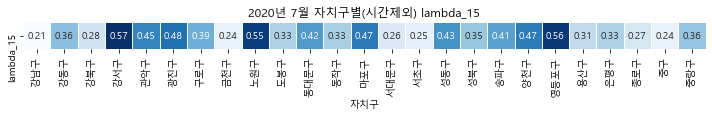

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.269531,0.479703,0.344407,0.695283,0.754349,0.944527,0.555624,0.378756,0.605988,0.384991,0.445276,0.501801,0.691107,0.372089,0.465827,0.694003,0.438253,0.521788,0.522312,0.899673,0.447906,0.517233,0.321726,0.271706,0.412883


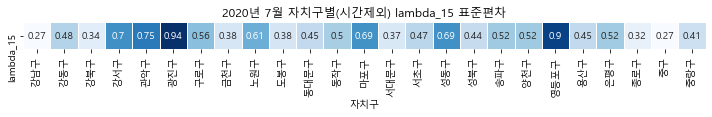

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.221526,0.35548,0.281274,0.563998,0.456206,0.481042,0.384297,0.244098,0.550486,0.322029,0.41774,0.330779,0.469608,0.265584,0.253427,0.427305,0.351914,0.408388,0.458466,0.560425,0.303937,0.319655,0.290188,0.253987,0.346086


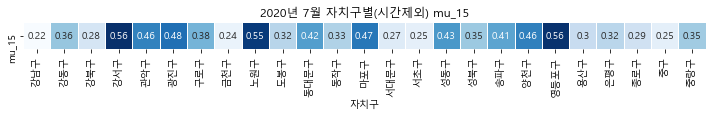

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.276728,0.4534,0.345426,0.67881,0.730433,0.904826,0.551596,0.36801,0.60203,0.368271,0.427939,0.458056,0.676701,0.339365,0.453582,0.654263,0.405532,0.519886,0.502931,0.88795,0.430902,0.457822,0.350732,0.297553,0.374926


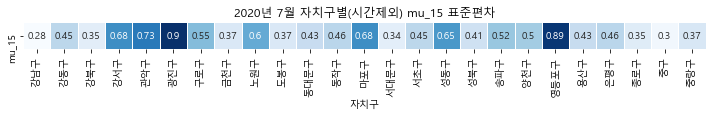

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.080026,1.031506,0.946628,1.14019,1.016672,0.916196,1.134734,1.411304,1.03776,1.147538,1.053683,0.992322,0.992651,1.002611,0.951281,1.135627,1.054067,1.001515,1.101047,1.043167,1.018889,1.042641,1.012127,1.041836,1.012596


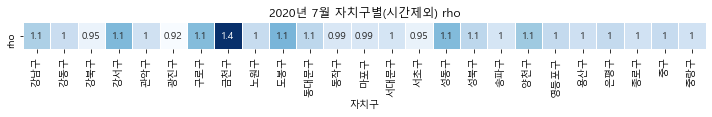

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.84765,1.774058,1.319121,3.025875,2.427016,2.61429,1.964548,1.01834,2.865859,1.671063,2.145073,1.811177,2.450029,1.203467,1.232661,2.323564,1.807587,2.192563,2.476242,3.118129,1.694264,1.742064,1.331857,1.040715,1.805989


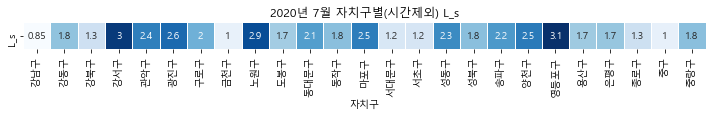

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.292031,2.251824,1.606387,3.288784,4.027305,5.298509,2.636154,1.411039,3.058689,1.868379,2.131507,2.850554,3.607033,1.812228,2.621209,3.486494,2.223889,2.770149,2.533811,5.039744,2.340964,2.910663,1.411138,1.117914,1.956687


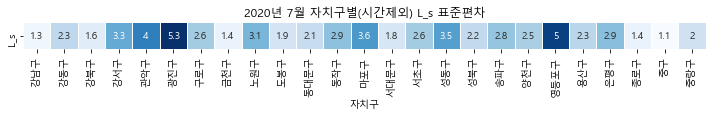

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,8.881216,10.143884,8.413081,15.002648,9.713024,10.504397,13.24155,14.001427,10.843482,12.875466,11.489286,11.224894,11.453867,9.303638,10.109376,14.243756,10.062281,12.54888,16.222178,15.759225,12.828823,10.436153,17.019256,15.237611,9.242818


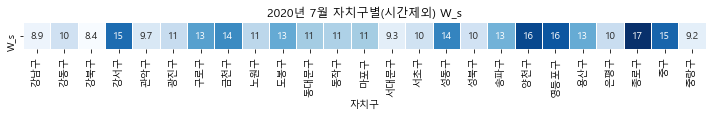

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,22.792814,23.851389,14.6773,35.835472,15.428119,26.106855,25.010187,36.50842,20.042559,23.504292,22.426059,28.510729,26.339864,17.81268,26.23617,39.55197,17.632543,28.572017,47.154803,43.8509,32.291883,24.983497,48.605978,50.931841,13.984347


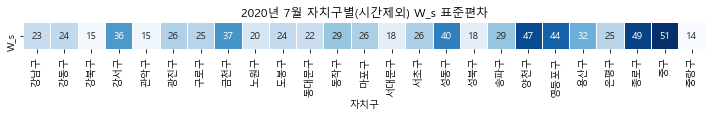

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.154096  0.151503  0.133857  0.094017  0.058313  0.037359  0.063000   
강동구  0.316172  0.278523  0.226870  0.139606  0.090054  0.088889  0.136022   
강북구  0.335982  0.314640  0.256930  0.169733  0.123866  0.078251  0.081149   
강서구  0.434624  0.349745  0.243052  0.162768  0.113896  0.103350  0.187779   
관악구  0.446057  0.450546  0.328908  0.223240  0.161414  0.117246  0.128164   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.175076  0.289082  0.213813  0.155638  0.153984  0.197822  0.204025   
강동구  0.252778  0.405466  0.231989  0.191308  0.221326  0.279122  0.316577   
강북구  0.127016  0.246976  0.148311  0.148942  0.155368  0.197581  0.221522   
강서구  0.415819  0.799504  0.417928  0.322270  0.375310  0.470409  0.498697   
관악구  0.210794  0.403350  0.257692  0.205831  0.224194  0.286725  0.328536   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.207954  0.241660  0.277985  0.347946  0.428453  0.340571  0.313620   
강동구  0.304480  0.368190  0.416219  0.536738  0.727330  0.711022  0.626792   
강북구  0.236013  0.279234  0.342364  0.391759  0.506174  0.476310  0.483367   
강서구  0.498387  0.578350  0.709119  0.919231  1.334057  1.123449  1.016253   
관악구  0.348015  0.392804  0.483375  0.626923  0.963151  0.906452  0.850124   

                                   
시간         21        22        23  
자치구                                
강남구  0.301971  0.313000  0.238420  
강동구  0.668817  0.681541  0.517204  
강북구  0.487399  0.507939  0.436366  
강서구  0.994913  0.956514  0.691625  
관악구  0.868114  0.912531  0.783127

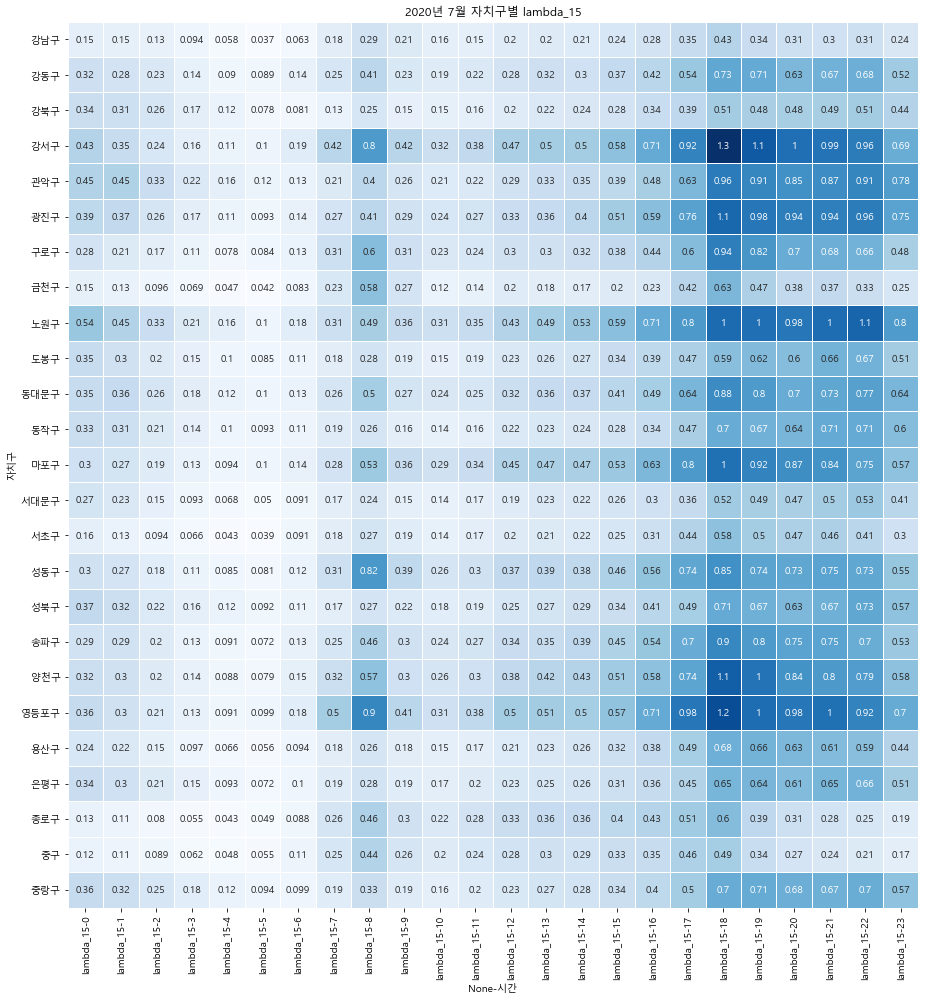

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.187671  0.153846  0.133471  0.102509  0.069586  0.061268  0.087750   
강동구  0.386300  0.337570  0.269674  0.166641  0.107351  0.095129  0.176851   
강북구  0.339401  0.331426  0.277189  0.194758  0.130301  0.092170  0.110368   
강서구  0.432232  0.332121  0.233623  0.161349  0.113624  0.114485  0.273826   
관악구  0.684002  0.522711  0.377427  0.264245  0.194002  0.148491  0.171283   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.246424  0.376696  0.266883  0.169097  0.135608  0.172853  0.180407   
강동구  0.330691  0.616586  0.294017  0.197147  0.233438  0.278770  0.321940   
강북구  0.162483  0.326125  0.190796  0.161021  0.165631  0.212412  0.235904   
강서구  0.578142  0.952334  0.445654  0.315823  0.375948  0.405586  0.451780   
관악구  0.357830  0.594342  0.356722  0.249227  0.261803  0.319797  0.405596   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.179914  0.218264  0.265787  0.327814  0.408307  0.369466  0.389044   
강동구  0.325095  0.409941  0.423127  0.549985  0.753307  0.698789  0.640028   
강북구  0.231915  0.280982  0.356339  0.385790  0.472812  0.469007  0.486452   
강서구  0.456840  0.517609  0.646102  0.896442  1.166026  0.939157  0.891922   
관악구  0.449326  0.461261  0.641322  0.802082  1.232229  1.202582  1.215979   

                                   
시간         21        22        23  
자치구                                
강남구  0.362025  0.360922  0.260164  
강동구  0.668291  0.664041  0.526129  
강북구  0.470027  0.483409  0.404351  
강서구  0.866254  0.807860  0.590197  
관악구  1.264982  1.243291  0.998951

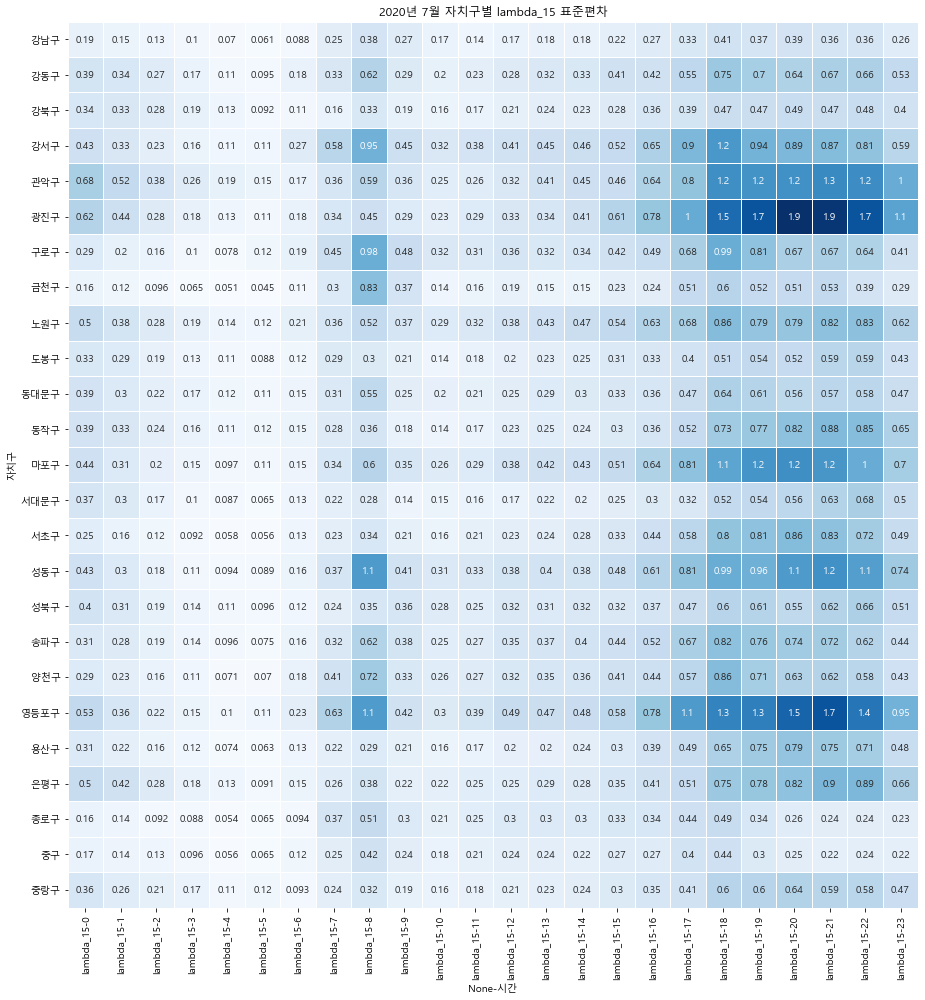

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.137503  0.148263  0.123380  0.092363  0.054866  0.047009  0.081679   
강동구  0.274554  0.241341  0.169887  0.116846  0.077240  0.097312  0.181989   
강북구  0.315465  0.266749  0.202495  0.146547  0.108871  0.066280  0.088836   
강서구  0.364086  0.287655  0.198263  0.140236  0.098201  0.114330  0.213648   
관악구  0.352778  0.350569  0.271712  0.203324  0.138958  0.123201  0.161166   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.161084  0.237731  0.181969  0.151020  0.173008  0.209333  0.211125   
강동구  0.345609  0.419534  0.256989  0.219624  0.249014  0.291129  0.326344   
강북구  0.154612  0.236769  0.168095  0.159022  0.168851  0.201109  0.242187   
강서구  0.491191  0.776985  0.407816  0.343921  0.411414  0.493362  0.510360   
관악구  0.356328  0.518610  0.292928  0.251985  0.281762  0.338462  0.354342   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.247656  0.289427  0.352840  0.488076  0.507927  0.359733  0.329336   
강동구  0.325717  0.393638  0.457079  0.582168  0.721326  0.646326  0.627509   
강북구  0.268145  0.312122  0.378276  0.409652  0.561114  0.470766  0.512979   
강서구  0.530025  0.638213  0.753474  1.037717  1.376675  1.098635  1.012097   
관악구  0.385484  0.457568  0.536352  0.681886  0.926303  0.881141  0.872829   

                                   
시간         21        22        23  
자치구                                
강남구  0.295906  0.260822  0.190378  
강동구  0.616487  0.529122  0.392921  
강북구  0.486517  0.451739  0.371472  
강서구  0.949504  0.797395  0.531141  
관악구  0.832754  0.809057  0.617990

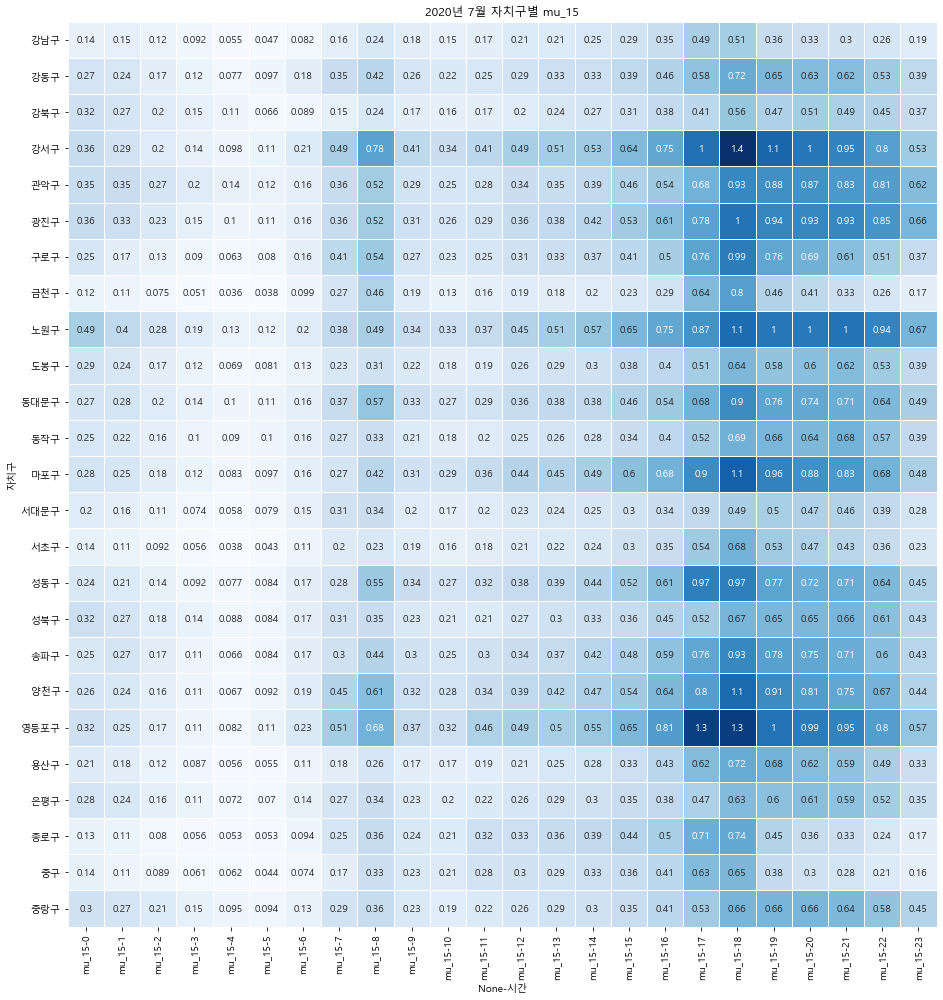

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.148122  0.135930  0.124514  0.103728  0.057165  0.051847  0.094402   
강동구  0.378761  0.294966  0.224866  0.155078  0.101008  0.100608  0.189458   
강북구  0.306900  0.301306  0.240511  0.186660  0.128189  0.077198  0.094796   
강서구  0.378002  0.289265  0.198395  0.150107  0.095966  0.112274  0.214659   
관악구  0.539402  0.465588  0.333686  0.280134  0.188105  0.154826  0.209238   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.181207  0.262956  0.166394  0.122307  0.145945  0.173971  0.178357   
강동구  0.328599  0.463509  0.288487  0.204447  0.232735  0.294337  0.341182   
강북구  0.127053  0.225158  0.154712  0.132080  0.143982  0.167340  0.213149   
강서구  0.437227  0.705962  0.348272  0.270228  0.319697  0.391526  0.432934   
관악구  0.474238  0.624308  0.343506  0.299441  0.320871  0.386611  0.376017   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.198875  0.263337  0.340067  0.477311  0.463807  0.375476  0.372657   
강동구  0.322874  0.403843  0.450766  0.620634  0.734363  0.657819  0.618907   
강북구  0.237748  0.293237  0.389449  0.387372  0.586569  0.493749  0.546070   
강서구  0.443880  0.516428  0.624293  0.965755  1.326621  0.963865  0.879442   
관악구  0.443608  0.547920  0.630019  0.840769  1.158420  1.168025  1.249773   

                                   
시간         21        22        23  
자치구                                
강남구  0.361734  0.290614  0.207243  
강동구  0.655483  0.565904  0.426582  
강북구  0.477905  0.462597  0.371710  
강서구  0.855859  0.724793  0.487690  
관악구  1.228626  1.181191  0.899152

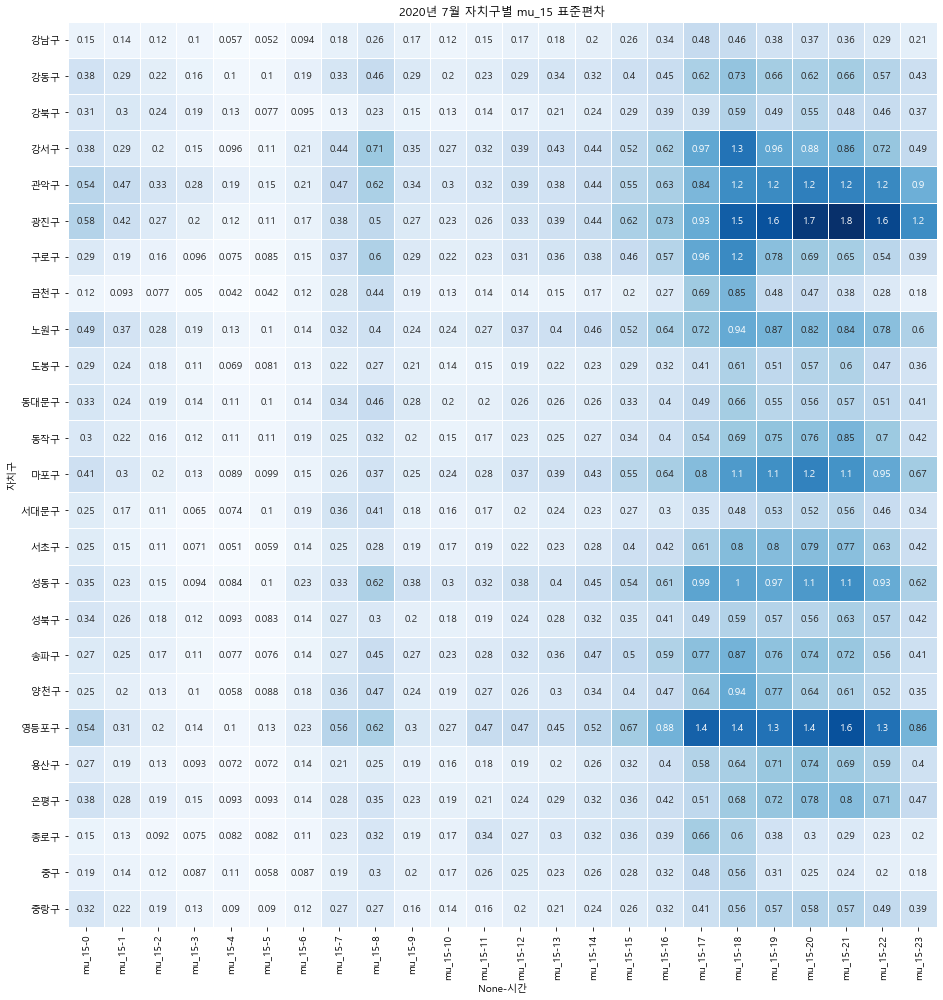

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.979574  1.071428  1.299568  1.163305  1.104790  1.068496  1.161623   
강동구  0.897978  1.031885  1.386718  1.270853  1.068860  1.459528  1.442720   
강북구  0.877626  1.160577  1.272574  1.160289  1.500887  1.237644  0.855988   
강서구  1.174575  1.415086  1.347033  1.388600  1.336181  1.286322  1.732933   
관악구  0.861113  1.262014  1.467541  1.187013  1.380843  1.171498  1.193326   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.427277  1.603322  1.368109  1.125249  0.967138  0.993466  1.012639   
강동구  0.879370  0.872016  0.874028  0.808457  0.771545  0.950973  0.959534   
강북구  0.933505  0.984491  0.878361  0.786522  0.713990  0.864929  0.744090   
강서구  1.345491  1.643985  1.155177  0.897031  0.814938  0.876314  0.926254   
관악구  0.745319  0.946862  0.908635  0.926182  0.807829  0.865261  0.851707   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.846464  0.894316  0.796304  0.734574  0.868445  0.945688  0.921741   
강동구  0.834464  0.831698  0.831599  0.912647  0.950588  1.133998  0.917658   
강북구  0.803264  0.762541  0.843183  0.792440  0.818952  0.922832  0.818754   
강서구  0.866160  0.828596  0.865689  0.872640  0.980771  0.981113  0.970077   
관악구  0.910791  0.799874  0.839931  0.850141  1.003165  0.990384  0.941819   

                                   
시간         21        22        23  
자치구                                
강남구  1.019792  1.255822  1.310393  
강동구  1.035954  1.321773  1.339981  
강북구  0.881612  1.031632  1.073350  
강서구  1.028702  1.226167  1.391174  
관악구  0.974714  1.141634  1.418427

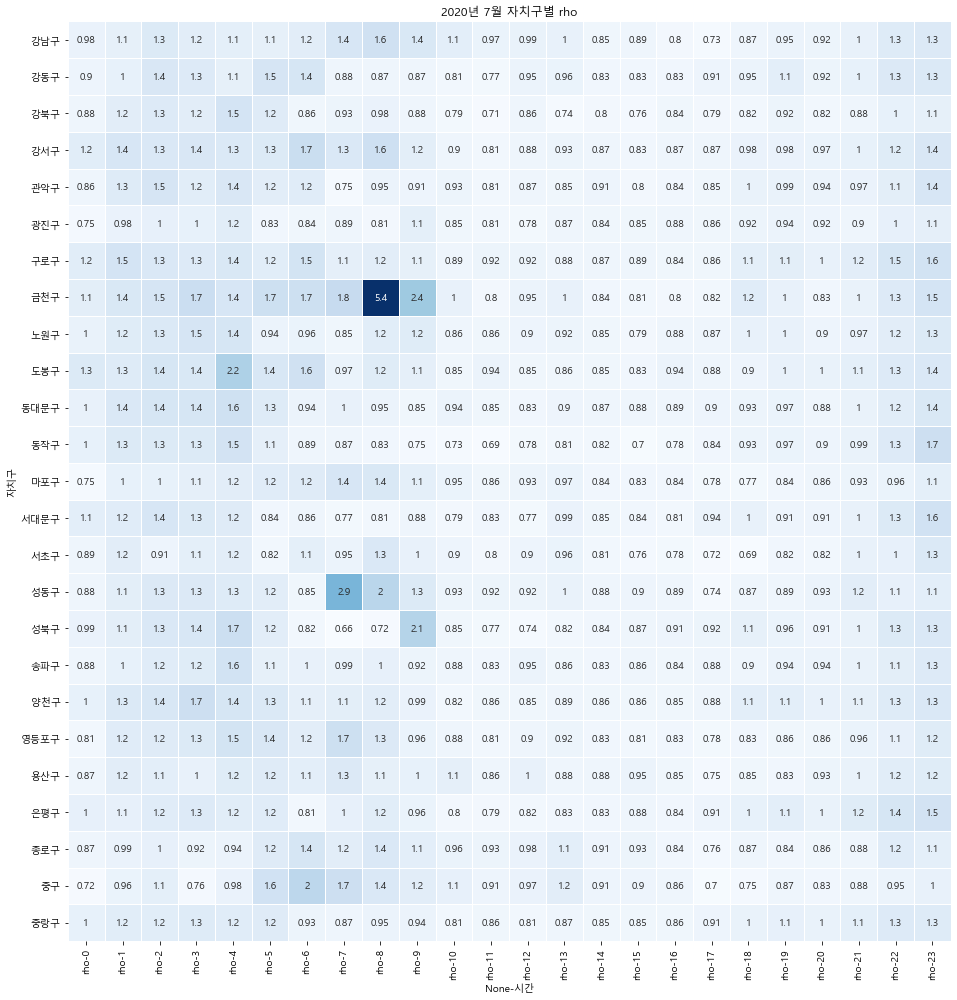

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.804062  0.890009  0.923684  0.904917  0.897145  0.570156  0.687770   
강동구  1.627508  2.016621  2.273540  2.102463  1.978997  1.616706  1.433060   
강북구  1.326964  1.495716  1.611005  1.392755  1.419125  1.439044  1.284040   
강서구  3.120079  3.642945  3.536477  3.367212  3.336535  2.847937  2.554895   
관악구  2.626036  3.212773  2.914289  2.895996  2.907139  2.333013  2.263740   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.935986  1.011986  0.918381  0.914814  0.841802  0.882206  0.853885   
강동구  1.234958  1.378250  1.547465  1.497733  1.660962  1.658847  1.672513   
강북구  1.122746  1.329302  1.200787  1.280295  1.307648  1.366539  1.236799   
강서구  2.347486  2.387732  2.710419  2.614964  2.839327  2.819186  2.971057   
관악구  1.571219  1.901839  2.127158  1.590675  1.517987  1.862212  2.395118   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.770506  0.749975  0.741141  0.678589  0.763222  0.833927  0.863707   
강동구  1.714504  1.738101  1.616011  1.734854  1.847416  1.934574  1.793146   
강북구  1.142026  1.152422  1.174122  1.306567  1.171679  1.341520  1.239990   
강서구  2.858164  2.782529  3.133820  3.093772  2.958833  3.038555  3.125288   
관악구  2.306818  1.910458  2.386183  2.253794  2.859621  2.711431  2.457187   

                                   
시간         21        22        23  
자치구                                
강남구  0.859656  1.008379  1.045893  
강동구  1.911828  2.262568  2.341570  
강북구  1.331683  1.464403  1.518484  
강서구  3.189897  3.590759  3.721783  
관악구  2.789493  3.013898  3.320269

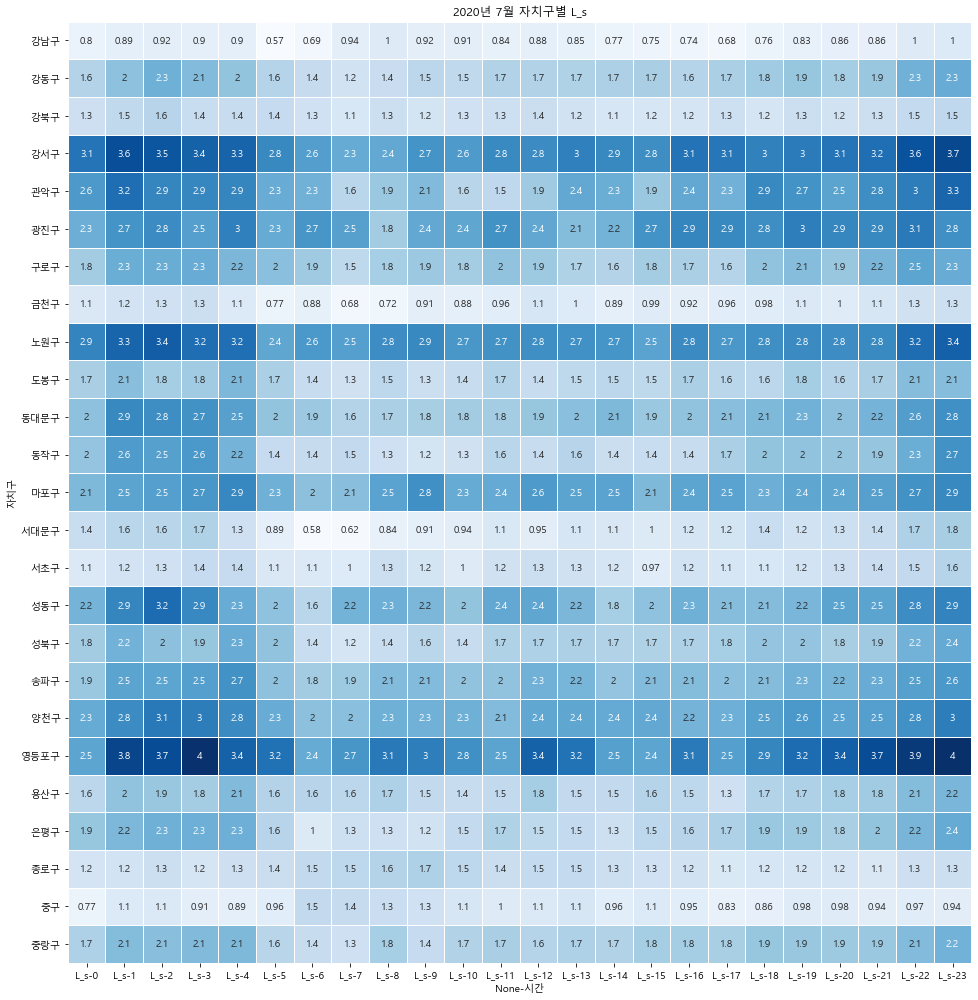

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.256397  1.344270  1.195650  1.231817  1.719663  0.925620  1.092754   
강동구  2.179481  2.699507  2.716710  2.535229  2.475884  2.684472  2.509933   
강북구  1.608304  1.696315  1.737740  1.697079  1.581403  1.718621  2.002963   
강서구  3.453115  3.528348  3.723382  3.657708  3.776930  3.775114  3.927657   
관악구  5.275670  4.674637  4.043132  4.676360  4.551827  3.843488  4.551966   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.676466  1.724022  1.636978  1.702495  1.281062  1.495863  1.078741   
강동구  2.015062  1.975661  2.245660  1.864532  2.198714  1.814803  1.860329   
강북구  1.676948  1.952432  1.633597  1.846992  1.765306  1.873453  1.522908   
강서구  3.518720  3.082125  3.334823  3.133637  3.455463  2.970587  3.119408   
관악구  3.662089  3.794524  4.968659  2.530413  1.839581  2.877093  4.667454   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.077146  0.927228  0.947110  0.798298  0.947414  1.091335  1.182069   
강동구  2.154437  2.080189  1.771166  1.988003  2.173465  2.170573  2.068334   
강북구  1.304834  1.252856  1.239798  1.524698  1.222329  1.445770  1.370236   
강서구  2.912039  2.779240  3.370009  3.250277  2.628235  2.495927  2.796020   
관악구  4.484432  2.110902  3.975651  3.102613  4.459243  3.812646  3.249876   

                                   
시간         21        22        23  
자치구                                
강남구  1.043268  1.487054  1.426189  
강동구  1.965870  2.514896  2.741375  
강북구  1.471661  1.553835  1.680867  
강서구  2.908662  3.101607  3.454073  
관악구  3.870523  4.247297  4.406339

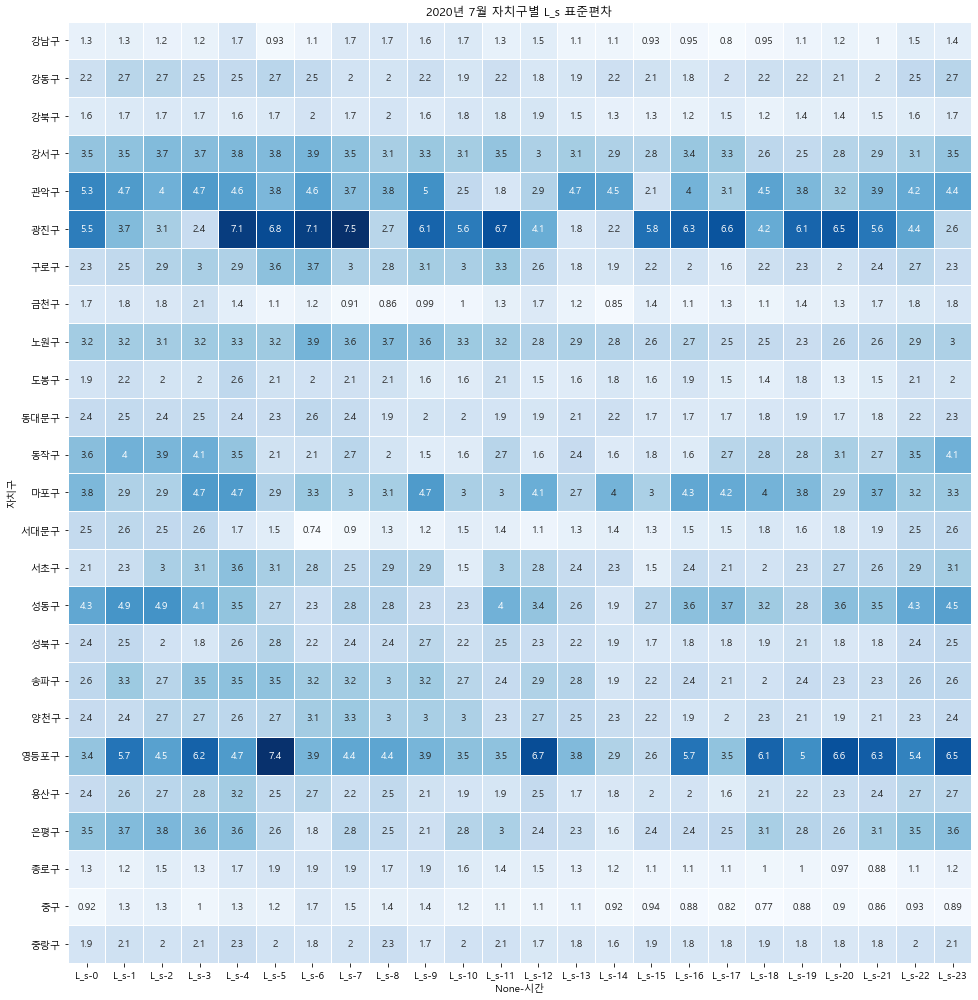

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   6.076357   9.023715  14.980664  19.956793  29.597833  26.078881   
강동구   5.715318   9.315859  17.828768  29.803607  36.019048  34.850696   
강북구   4.279607   7.270863  11.492140  14.189074  22.187405  29.146771   
강서구  12.972015  26.553751  34.367111  37.824322  61.160516  51.344738   
관악구   4.836453  10.102715  13.975271  17.169779  26.421715  30.081205   

                                                                               \
시간          6          7         8          9          10        11        12   
자치구                                                                             
강남구  20.713946  10.894956  7.167555   6.970095   8.261880  6.771595  5.379538   
강동구  19.041245   5.753315  5.483380   8.760446   8.401588  7.981625  6.942858   
강북구  18.280263  11.171006  6.941128  10.167535   8.874636  8.656982  7.203271   
강서구  30.352585   9.463606  5.323057   9.425431   9.574384  8.312356  6.880230   
관악구  27.272039  11.255070  6.108552   9.828646  10.237999  7.971324  7.661327   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  5.343389  4.120247  3.683655  3.017553  2.237613  2.211798  2.979679   
강동구  6.236478  6.339795  5.448758  4.227426  3.671298  2.795391  3.012061   
강북구  5.714139  4.997241  4.414211  3.800039  3.487517  2.555471  3.207666   
강서구  6.878076  6.569790  5.238937  4.877727  3.903882  2.936660  3.418659   
관악구  7.053030  6.882002  5.746137  5.066380  3.901877  3.162942  3.258233   

                                             
시간         20        21        22        23  
자치구                                          
강남구  3.437497  3.743854  4.414635  6.612862  
강동구  2.990902  3.370928  4.254491  6.251097  
강북구  3.043523  3.057410  3.685129  4.367107  
강서구  3.677557  4.193140  5.759233  8.926082  
관악구  3.335666  3.818039  3.958179  5.750899

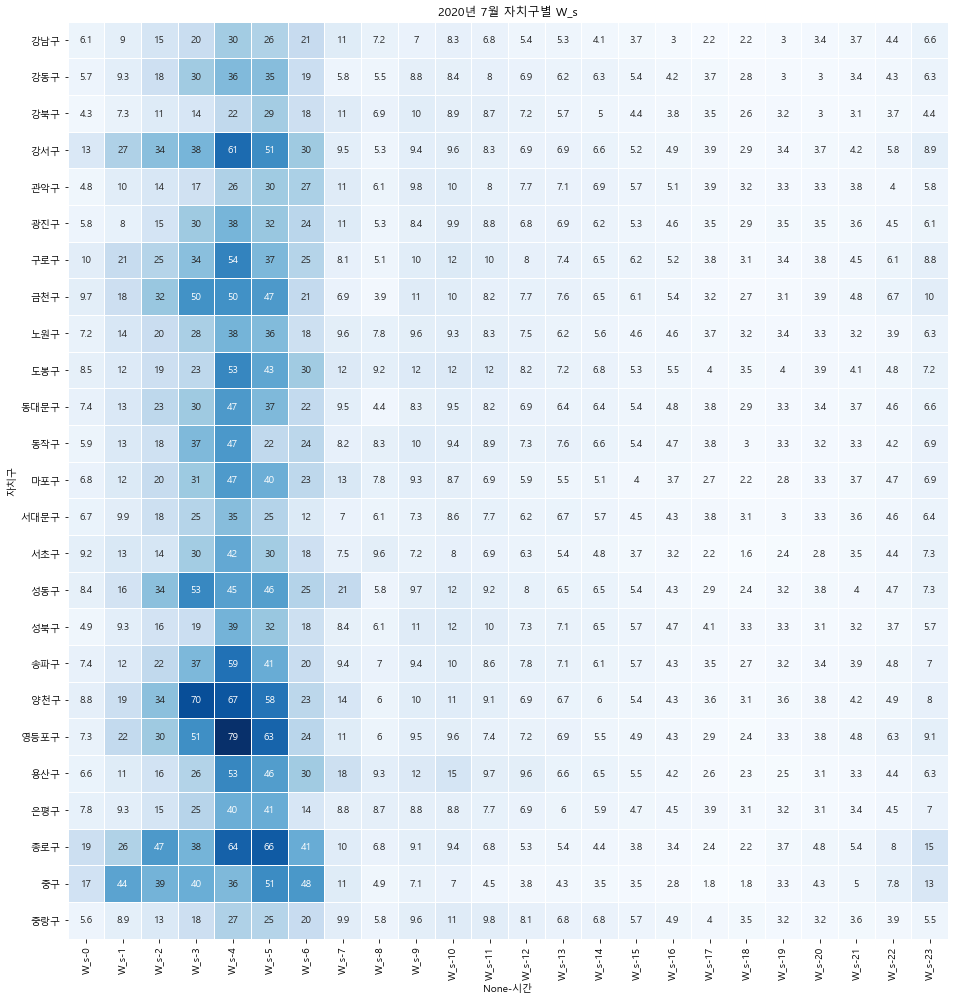

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   7.371095  11.369393  45.022402  28.665072  64.372734  41.431673   
강동구   6.193169   9.145321  20.475089  41.219633  43.024216  76.926299   
강북구   3.662851   8.970649  15.321377  16.658466  33.982922  32.068825   
강서구  23.232060  58.382728  51.400402  43.460558  91.738811  70.501598   
관악구   5.147613  10.674987  13.710867  16.547405  28.820821  34.678913   

                                                                      \
시간          6          7          8          9          10        11   
자치구                                                                    
강남구  39.358813  18.150673  10.337711   8.131264   9.534536  6.517446   
강동구  34.666366   6.504291   6.046795   9.449746   7.448401  6.720377   
강북구  23.242520  18.967602   9.315378  13.203972   7.598054  7.989644   
강서구  49.143005  15.086596   7.796070   9.800220   7.418921  6.182729   
관악구  31.717447  18.261454   7.296675   9.681899  10.331966  5.757337   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  5.373736  5.879684  3.908358  3.500758  2.783829  2.128826  2.205182   
강동구  5.819940  4.556024  5.393043  4.724348  3.133352  2.836178  1.996750   
강북구  6.280917  4.388003  3.750120  3.402396  2.972284  2.640283  1.934425   
강서구  4.502501  4.089334  3.752089  3.200119  3.236744  2.781088  1.981074   
관악구  6.623021  5.000588  5.079081  4.315957  3.711371  2.603392  2.112382   

                                                       
시간         19        20        21        22        23  
자치구                                                    
강남구  2.775453  3.269862  3.338023  4.108257  7.245321  
강동구  2.021334  2.141017  2.565868  3.327079  5.418860  
강북구  2.300552  2.453775  2.331073  3.109992  3.605715  
강서구  1.912206  1.995647  2.614121  5.257469  7.083641  
관악구  1.941216  2.070219  2.403821  2.376544  4.015120

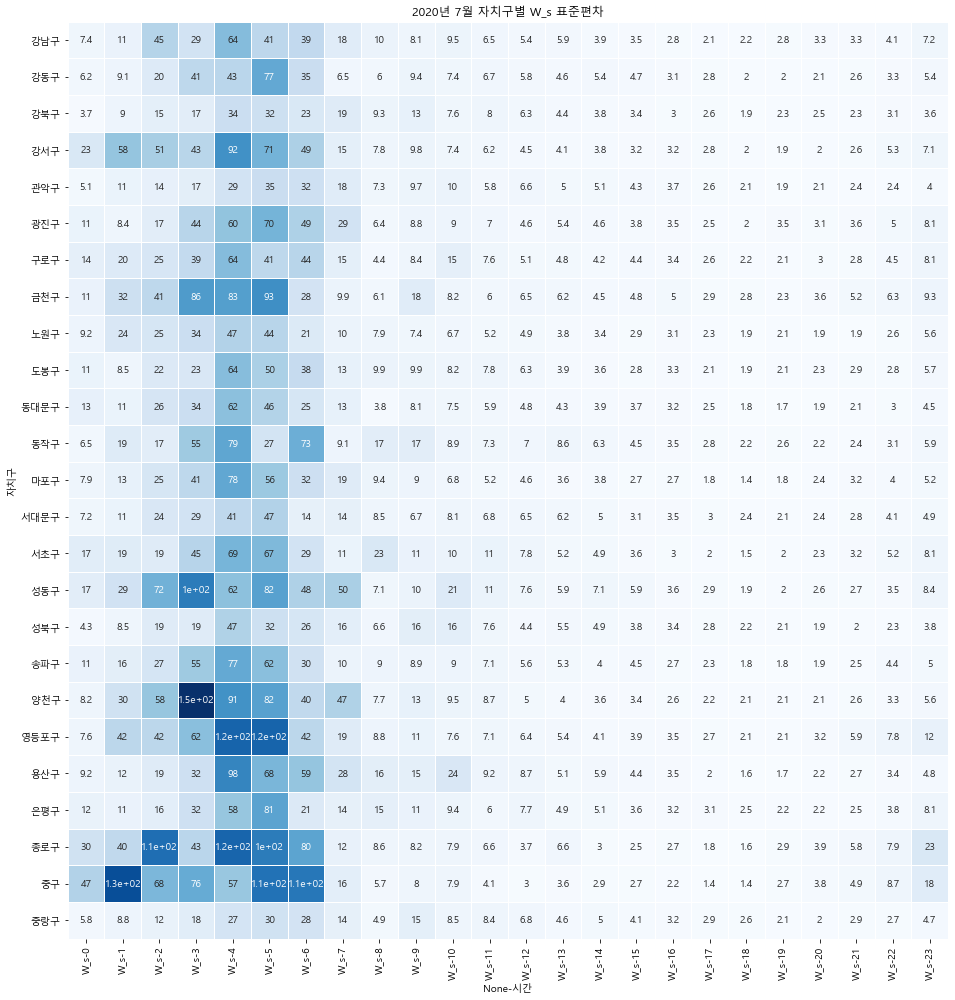

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2184,흑석한강푸르지오 106동앞
2185,흑석한강푸르지오(110동)
2186,흥국사 정류장
2187,희성오피앙


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['건국대학교 학생회관',
 'KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학교(어?閨냅걀?',
 '서울과학기술대학교(어학교육원)',
 '서울대학교 정문',
 '서울도봉초등학교인근',
 '서울디자인직

In [43]:
len(school)

132

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1499,광진구,건국대학교 학생회관,0,0.177419,0.169355,1.047619,2.635503,18.263150,학교
1500,광진구,건국대학교 학생회관,1,0.137097,0.201613,0.680000,1.466712,11.280801,학교
1501,광진구,건국대학교 학생회관,2,0.064516,0.072581,0.888889,2.159371,38.107107,학교
1502,광진구,건국대학교 학생회관,3,0.080645,0.040323,2.000000,4.095238,103.200000,학교
1503,광진구,건국대학교 학생회관,4,0.032258,0.080645,0.400000,0.641990,20.025218,학교
...,...,...,...,...,...,...,...,...,...
52909,동대문구,휘봉고등학교 앞,20,0.338710,0.467742,0.724138,0.788472,3.035862,학교
52910,동대문구,휘봉고등학교 앞,21,0.379032,0.314516,1.205128,1.123674,4.917114,학교
52911,동대문구,휘봉고등학교 앞,22,0.516129,0.201613,2.560000,1.549122,8.526742,학교
52912,동대문구,휘봉고등학교 앞,23,0.508065,0.258065,1.968750,1.420174,6.444737,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 '?ゴ育逃맙?8번출구 앞',
 '홍대입구역 8번출구 앞',
 '?岺?역4번출구 주변',
 '쌍문역4번출구 주변',
 '?潔틥怜타? 1번 출구',
 '미아사거리 1??출구',
 '미아사거리 1번 출구',
 '?潔틸?1번 출구 뒤',
 '미아역 1번 출구 뒤',
 '?濫訶?역 4번 출구 건너편',
 '왕십리역 4번 출구 건너편',
 '?炤貶?3번-4번 출구사이',
 '잠원역 3번-4번 출구사이',
 '?鵝訶?역 8번출구 앞',
 '답십리역 8번출구 앞',
 '?도箸貪맡뼁?1번출구',
 '영등포구청역 1번출구',
 '?맨熾?1번출구',
 '회현역 1번출구',
 '?오謗?5번출구 동작주차공원',
 '동작역 5번출구 동작주차공원',
 '?탓六轅?1번 출구',
 '신용산역 1번 출구',
 '?택結?2호선) 1번출구 옆',
 '신촌역(2호선) 1번출구 옆',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 

In [46]:
len(subway)

449

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
73,강남구,3호선 매봉역 3번출구앞,0,0.290323,0.201613,1.440000,1.237859,7.887213,지하철
74,강남구,3호선 매봉역 3번출구앞,1,0.177419,0.250000,0.709677,0.775740,5.660377,지하철
75,강남구,3호선 매봉역 3번출구앞,2,0.241935,0.209677,1.153846,1.095076,7.324176,지하철
76,강남구,3호선 매봉역 3번출구앞,3,0.112903,0.104839,1.076923,1.049360,14.484330,지하철
77,강남구,3호선 매봉역 3번출구앞,4,0.064516,0.096774,0.666667,0.736842,14.466667,지하철
...,...,...,...,...,...,...,...,...,...
53006,동작구,흑석역 4번출구,19,0.620968,0.838710,0.740385,1.133566,2.149217,지하철
53007,동작구,흑석역 4번출구,20,0.701613,0.508065,1.380952,1.892012,4.352849,지하철
53008,동작구,흑석역 4번출구,21,0.491935,0.564516,0.871429,1.328890,3.380844,지하철
53009,동작구,흑석역 4번출구,22,0.717742,0.483871,1.483333,1.972370,4.662962,지하철


In [48]:
apart

['?《泉接?아파트 앞',
 '가락삼환아파트 앞',
 '우성아파트?怜타? (기업은행앞)',
 '우성아파트사거리 (기업은행앞)',
 '?鵝訶? 래미안엘파인아파트 입구',
 '답십리 래미안엘파인아파트 입구',
 'DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉푸르지오아파트 상가',
 '개봉아이파크아파트 앞',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞?뵈?',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피

In [49]:
len(apart)

186

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
290,송파구,?《泉接?아파트 앞,0,0.000000,0.000000,0.000000,0.0,0.0,아파트
291,송파구,?《泉接?아파트 앞,1,0.000000,0.008065,0.000000,0.0,0.0,아파트
292,송파구,?《泉接?아파트 앞,2,0.000000,0.000000,0.000000,0.0,0.0,아파트
293,송파구,?《泉接?아파트 앞,3,0.000000,0.000000,0.000000,0.0,0.0,아파트
294,송파구,?《泉接?아파트 앞,4,0.000000,0.000000,0.000000,0.0,0.0,아파트
...,...,...,...,...,...,...,...,...,...
52183,서대문구,홍은센트레빌 아파트 앞,19,0.129032,0.233871,0.551724,0.0,0.0,아파트
52184,서대문구,홍은센트레빌 아파트 앞,20,0.096774,0.225806,0.428571,0.0,0.0,아파트
52185,서대문구,홍은센트레빌 아파트 앞,21,0.137097,0.145161,0.944444,0.0,0.0,아파트
52186,서대문구,홍은센트레빌 아파트 앞,22,0.088710,0.112903,0.785714,0.0,0.0,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오?퓰뵀?건너편 소공원',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 

In [52]:
len(park)

107

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
3828,마포구,가온문화공원,0,0.064516,0.072581,0.888889,1.353347,26.476190,공원
3829,마포구,가온문화공원,1,0.040323,0.040323,1.000000,1.500000,49.600000,공원
3830,마포구,가온문화공원,2,0.008065,0.024194,0.333333,0.450000,57.230769,공원
3831,마포구,가온문화공원,3,0.000000,0.016129,0.000000,0.000000,0.000000,공원
3832,마포구,가온문화공원,4,0.016129,0.016129,1.000000,1.500000,124.000000,공원
...,...,...,...,...,...,...,...,...,...
52836,중구,훈련원공원주차장 앞,19,0.161290,0.225806,0.714286,1.092342,7.882045,공원
52837,중구,훈련원공원주차장 앞,20,0.322581,0.322581,1.000000,1.500000,6.200000,공원
52838,중구,훈련원공원주차장 앞,21,0.266129,0.491935,0.540984,0.803870,3.281418,공원
52839,중구,훈련원공원주차장 앞,22,0.233871,0.354839,0.659091,1.002950,4.874975,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,광진구,건국대학교 학생회관,0,0.177419,0.169355,1.047619,2.635503,18.263150,학교
1,광진구,건국대학교 학생회관,1,0.137097,0.201613,0.680000,1.466712,11.280801,학교
2,광진구,건국대학교 학생회관,2,0.064516,0.072581,0.888889,2.159371,38.107107,학교
3,광진구,건국대학교 학생회관,3,0.080645,0.040323,2.000000,4.095238,103.200000,학교
4,광진구,건국대학교 학생회관,4,0.032258,0.080645,0.400000,0.641990,20.025218,학교
...,...,...,...,...,...,...,...,...,...
21210,중구,훈련원공원주차장 앞,19,0.161290,0.225806,0.714286,1.092342,7.882045,공원
21211,중구,훈련원공원주차장 앞,20,0.322581,0.322581,1.000000,1.500000,6.200000,공원
21212,중구,훈련원공원주차장 앞,21,0.266129,0.491935,0.540984,0.803870,3.281418,공원
21213,중구,훈련원공원주차장 앞,22,0.233871,0.354839,0.659091,1.002950,4.874975,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.303681  0.257185  0.170711  0.119686  0.091498  0.068058  0.105065   
아파트  0.294128  0.244553  0.178320  0.112730  0.073448  0.054761  0.069892   
지하철  0.366197  0.345410  0.249946  0.166344  0.116406  0.117717  0.206301   
학교   0.285753  0.235185  0.164989  0.100257  0.068732  0.051931  0.061522   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.192870  0.339463  0.217214  0.188574  0.209225  0.263566  0.284896   
아파트  0.151405  0.268644  0.152966  0.142907  0.176682  0.229232  0.253122   
지하철  0.406477  0.585369  0.374793  0.301333  0.353438  0.433400  0.473058   
학교   0.148399  0.272605  0.184018  0.149621  0.160435  0.211877  0.237231   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.317606  0.372927  0.463521  0.598432  0.830042  0.753618  0.751658   
아파트  0.257024  0.303590  0.366719  0.486646  0.708637  0.678980  0.589490   
지하철  0.488864  0.571377  0.679485  0.899472  1.170864  0.988720  0.913122   
학교   0.241508  0.284030  0.328324  0.410863  0.606305  0.574902  0.516923   

                                   
시간         21        22        23  
특성                                 
공원   0.763717  0.727163  0.549593  
아파트  0.622745  0.648847  0.516996  
지하철  0.910572  0.863622  0.637205  
학교   0.530547  0.555474  0.435239

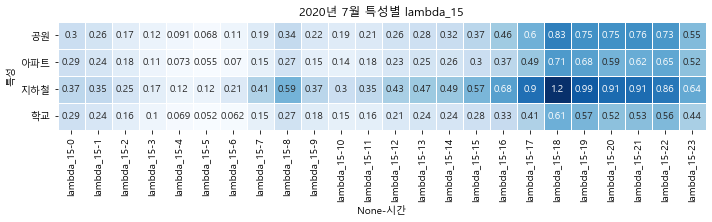

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.364413  0.272205  0.173179  0.119560  0.095518  0.073364  0.108596   
아파트  0.302871  0.219989  0.168298  0.108018  0.072868  0.059784  0.086129   
지하철  0.504936  0.378485  0.255705  0.172129  0.121212  0.128396  0.244723   
학교   0.325796  0.237723  0.182045  0.105522  0.078255  0.059096  0.066355   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.236208  0.371874  0.231257  0.204242  0.208005  0.248655  0.271587   
아파트  0.245358  0.535298  0.172883  0.148316  0.174318  0.220199  0.247431   
지하철  0.482451  0.674064  0.399088  0.305041  0.351837  0.420374  0.450289   
학교   0.159672  0.318226  0.214012  0.159131  0.143102  0.192522  0.206665   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.309164  0.359695  0.455455  0.557023  0.764682  0.707653  0.788702   
아파트  0.240388  0.283669  0.335845  0.433297  0.635968  0.629431  0.608739   
지하철  0.472934  0.573732  0.711754  0.975521  1.263671  1.236915  1.340062   
학교   0.232170  0.283302  0.340334  0.433265  0.615253  0.631268  0.594914   

                                   
시간         21        22        23  
특성                                 
공원   0.770313  0.724154  0.544643  
아파트  0.619137  0.597684  0.439182  
지하철  1.372206  1.227944  0.819929  
학교   0.594057  0.581225  0.433816

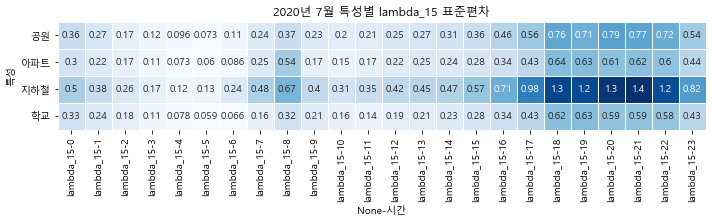

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.236272  0.204179  0.131218  0.079515  0.064591  0.096548  0.182243   
아파트  0.225388  0.198826  0.134909  0.088059  0.065557  0.096341  0.195586   
지하철  0.338355  0.295037  0.221873  0.153961  0.104929  0.094188  0.161075   
학교   0.215161  0.173118  0.122544  0.077835  0.053397  0.073619  0.151149   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.379937  0.424857  0.270425  0.228821  0.253166  0.288438  0.314893   
아파트  0.361516  0.385319  0.224159  0.194676  0.216875  0.251951  0.270075   
지하철  0.357551  0.599558  0.354048  0.300237  0.355988  0.439328  0.475645   
학교   0.308284  0.350868  0.206500  0.195687  0.205034  0.227212  0.260325   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.332756  0.419053  0.503995  0.640639  0.810145  0.712692  0.716235   
아파트  0.289802  0.326960  0.393384  0.521592  0.664889  0.612470  0.589880   
지하철  0.524876  0.617555  0.723310  0.984895  1.268715  1.029205  0.933113   
학교   0.270039  0.334311  0.398644  0.465054  0.558162  0.516862  0.509775   

                                   
시간         21        22        23  
특성                                 
공원   0.687067  0.569943  0.390036  
아파트  0.554804  0.489377  0.334677  
지하철  0.913464  0.787000  0.572006  
학교   0.481977  0.420455  0.302297

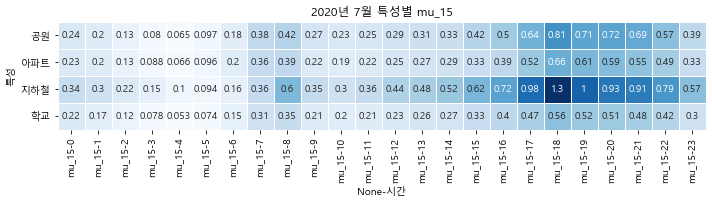

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.280408  0.209298  0.136017  0.077253  0.060436  0.096154  0.188844   
아파트  0.253667  0.181446  0.130345  0.080544  0.070112  0.100284  0.189736   
지하철  0.479654  0.334544  0.235778  0.169012  0.113544  0.099158  0.174098   
학교   0.257684  0.182314  0.135282  0.083732  0.066476  0.092307  0.168479   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.372623  0.385654  0.241809  0.187050  0.201207  0.250269  0.277400   
아파트  0.332435  0.368020  0.194395  0.163484  0.215914  0.223498  0.231474   
지하철  0.392080  0.643538  0.334318  0.270614  0.326333  0.397450  0.434070   
학교   0.302160  0.312738  0.167229  0.155577  0.162737  0.186045  0.204362   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.302387  0.383344  0.452359  0.576648  0.765019  0.688815  0.736499   
아파트  0.255483  0.284345  0.343858  0.539288  0.607835  0.584758  0.584840   
지하철  0.510651  0.619083  0.734627  1.007471  1.328810  1.234857  1.251662   
학교   0.220695  0.295456  0.354516  0.446827  0.559128  0.517573  0.568234   

                                   
시간         21        22        23  
특성                                 
공원   0.718817  0.573556  0.388436  
아파트  0.561034  0.469178  0.327778  
지하철  1.315653  1.151640  0.784382  
학교   0.567551  0.473868  0.351006

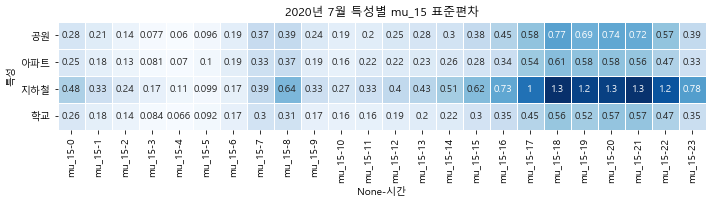

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.112617  1.236691  1.300320  1.613105  1.402928  0.960669  1.439484   
아파트  1.116509  1.442988  1.394621  1.350755  1.267398  0.810616  0.552737   
지하철  0.771672  1.097802  1.104785  1.136285  1.240319  1.523565  1.510098   
학교   1.403171  1.447617  1.545492  1.499817  1.410013  0.968963  0.707157   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.836003  1.060546  0.909618  0.822924  0.751652  0.895241  0.956606   
아파트  0.502927  0.661469  0.664920  0.793442  0.767213  0.882102  0.864726   
지하철  1.262496  0.995459  1.052149  0.922242  0.902836  0.908960  0.922815   
학교   1.052711  1.096932  0.998498  0.797868  0.812784  0.915928  0.903494   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.916976  0.885480  0.858478  0.903228  1.023447  1.055186  1.004010   
아파트  0.828957  0.877766  0.866138  0.946125  1.072765  1.094753  0.943373   
지하철  0.867530  0.850492  0.882968  0.828811  0.862684  0.876692  0.870278   
학교   0.897869  0.808151  0.812571  0.900428  1.111564  1.122195  0.990474   

                                   
시간         21        22        23  
특성                                 
공원   1.120325  1.324705  1.500441  
아파트  1.112369  1.334995  1.657814  
지하철  0.923178  1.026187  1.052105  
학교   1.186785  1.387109  1.676922

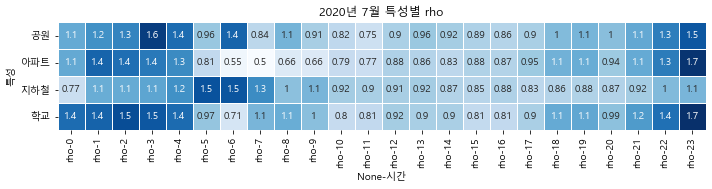

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.191228  2.489508  2.513307  2.801503  2.754943  1.401508  1.201003   
아파트  1.751188  2.087553  2.211017  2.163624  1.825056  1.107715  0.668338   
지하철  2.325544  3.167321  3.041892  2.989842  3.025630  3.302136  3.131021   
학교   1.562183  1.780180  1.746998  1.764795  1.661990  1.063637  0.729968   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.099526  1.747977  1.439439  1.502796  1.613870  1.851923  1.717265   
아파트  0.773033  1.134817  1.158510  1.156648  1.390140  1.604947  1.639957   
지하철  2.999462  2.468447  2.753277  2.647181  2.807534  2.791882  2.679604   
학교   0.871176  1.201055  1.256751  1.027570  1.218583  1.434576  1.319821   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.961420  1.798814  1.950092  2.082263  2.177453  2.197836  2.227104   
아파트  1.504591  1.609503  1.653739  1.685546  1.897740  1.946592  1.772013   
지하철  2.367851  2.396066  2.662664  2.500417  2.529212  2.618795  2.761434   
학교   1.416360  1.333906  1.347654  1.411687  1.628727  1.696224  1.531831   

                                   
시간         21        22        23  
특성                                 
공원   2.384713  2.650822  2.749171  
아파트  2.005818  2.260074  2.480183  
지하철  2.768567  3.043378  3.051748  
학교   1.637950  1.918826  1.936013

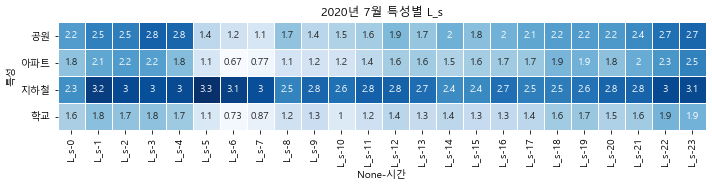

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.066235  3.242609  3.075661  3.560985  3.699201  2.381308  2.056138   
아파트  2.330955  2.485481  2.640397  2.761548  2.255254  1.753686  1.471481   
지하철  4.006871  4.506376  3.842287  4.478855  4.729916  5.905161  4.967420   
학교   2.073291  2.257604  2.193146  2.363277  2.682875  1.689293  1.406326   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.395260  3.041366  1.858310  2.108016  2.084846  2.318799  1.879641   
아파트  1.595896  1.938267  1.648233  1.398074  1.622559  1.991165  1.930526   
지하철  4.938938  3.376821  4.391578  3.942105  4.505477  4.745465  3.223792   
학교   1.734354  2.310928  2.138460  1.672271  1.893091  2.035599  1.484037   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.222327  2.088065  2.276752  2.332995  2.430711  2.305025  2.465839   
아파트  1.646287  1.740348  1.822261  1.665726  2.014762  2.084529  1.933066   
지하철  2.651120  3.376218  4.411089  3.895470  4.137149  4.104848  4.929623   
학교   2.051678  1.899232  1.922855  1.947390  2.140963  2.327876  2.000409   

                                   
시간         21        22        23  
특성                                 
공원   2.635623  2.924497  3.110430  
아파트  2.187888  2.502316  2.653675  
지하철  4.578892  4.117186  4.449737  
학교   2.009389  2.436116  2.293888

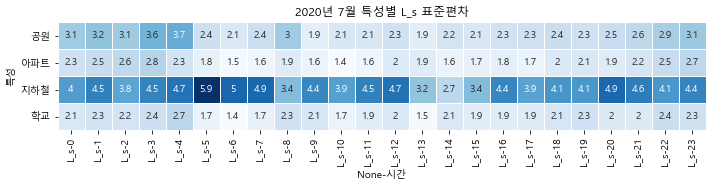

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원    9.071968  16.365311  25.311923  40.079204  51.865702  37.255682   
아파트   7.062837  15.176350  20.903541  31.768751  40.776493  29.061230   
지하철   6.749770  17.049588  20.058738  31.539583  48.314331  50.233425   
학교   12.005212  13.697980  21.626624  33.675011  50.523255  33.599840   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   21.130619   7.800856  7.299396  8.774472  9.212283  8.023781  8.239176   
아파트  11.048573   5.817574  5.817221  8.362730  9.753017  9.194234  8.452579   
지하철  30.174875  12.141579  6.126379  9.297194  9.796198  8.279005  6.532479   
학교   19.491006   9.495880  8.065821  8.934982  9.424593  9.063336  8.052987   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   6.887534  6.886658  5.586096  4.598379  3.857346  3.217587  3.605606   
아파트  7.413469  6.701845  6.120224  4.953003  4.137527  3.224460  3.325480   
지하철  5.903793  5.359614  4.476160  3.952024  2.905866  2.256314  2.898099   
학교   6.740791  6.485874  5.365509  4.631012  4.013565  3.396879  3.786664   

                                             
시간         20        21        22        23  
특성                                           
공원   3.648653  4.015198  5.459635  7.977965  
아파트  3.298560  3.821988  4.464996  7.538621  
지하철  3.315058  3.568232  4.625633  6.600907  
학교   3.842594  4.584884  5.471492  8.554929

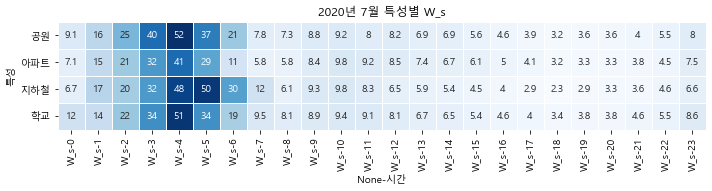

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원    9.653752  22.593142  26.854672  42.052395  61.373524  64.139901   
아파트   8.503782  38.691602  24.812659  41.854796  48.659504  51.485609   
지하철   9.523510  53.043961  42.316028  56.220792  86.086438  76.986425   
학교   25.328639  17.980406  25.975422  43.191236  78.706591  52.407601   

                                                                       \
시간          6          7          8          9          10         11   
특성                                                                      
공원   42.358647  14.425350   9.562072   8.125190   7.117349   5.479638   
아파트  22.477113   9.718030   8.766852   8.928796  10.282172   8.423248   
지하철  56.999358  22.957505   7.191831  10.134745   9.300363   6.348438   
학교   42.301961  24.172542  21.533407   9.217403  10.344284  10.862300   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   7.554378  4.654909  4.478745  4.422046  3.136896  2.493138  2.255481   
아파트  7.498941  6.451275  5.523837  5.604954  3.616754  3.166765  2.455772   
지하철  5.444427  3.959562  4.128602  3.088524  2.779760  2.100228  1.618778   
학교   6.250691  4.815200  4.559817  3.728419  3.666341  3.035328  2.235445   

                                                       
시간         19        20        21        22        23  
특성                                                     
공원   2.239322  2.246524  2.537182  5.611791  5.958362  
아파트  2.292104  2.179868  2.734224  3.230730  6.477669  
지하철  1.979741  2.296174  2.590162  4.163454  6.572866  
학교   3.191342  2.866614  3.991155  4.759747  9.501546

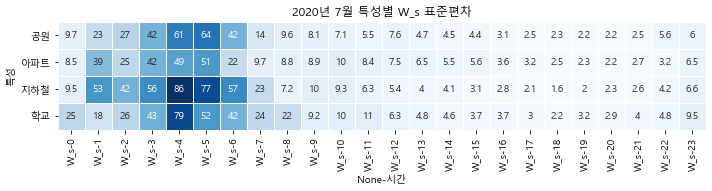

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 7월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()